# Introdu√ß√£o a Modula√ß√£o Digital com √Åudio

‚ö†Ô∏è Esse codigo n√£o funciona em maquinas virtuais ou no WSL


Sobre esse Laborat√≥rio:

- [Setup](#setup)
- [Parametros e Bibliotecas](#parametros-de-configura√ß√µes)
- [Fun√ß√µes e Metodos](#fun√ß√µes)
- [O Laborat√≥rio](#o-laborat√≥rio)
    1. [Etapa 1: Compreendendo com a Codifica√ß√£o/Modula√ß√£o de dados](#etapa-1-compreendendo-com-a-codifica√ß√£omodula√ß√£o-de-dados)
    1. [Etapa 2: Decodifica√ß√£o](#etapa-2-decodifica√ß√£o)
    1. [Etapa 3: Impacto do Ru√≠do na Comunica√ß√£o](#etapa-3-impacto-do-ru√≠do-na-comunica√ß√£o)
    1. [Etapa 4: Decodifica√ß√£o no mundo real](#etapa-4-decodifica√ß√£o-no-mundo-real)



## Setup

‚ö†Ô∏è **Aten√ß√£o** : Execute o c√≥digo abaixo **apenas uma vez** para realizar a configura√ß√£o inicial do ambiente.

In [3]:
%pip install numpy matplotlib soundfile sounddevice scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


escolhendo a saida e entrada de audio

In [4]:
import os

import sounddevice as sd
import numpy as np
from scipy.io import wavfile

O comando `sd.query_devices()` listar√° todas as **entradas** e **sa√≠das** de √°udio dispon√≠veis no seu computador. 

A partir dessa lista, identifique qual √© a sua **entrada** (microfone) e **sa√≠da** (alto-falante) de √°udio desejada e atribua esses valores √†s vari√°veis `input_device` e `output_device`, respectivamente. Por exemplo,

```
   5 LG ULTRAWIDE (HD Audio Driver f, MME (0 in, 2 out)
   6 Alto-falantes (3- Realtek(R) Au, MME (0 in, 2 out)
>  7 Driver de captura de som prim√°rio, Windows DirectSound (2 in, 0 out)
   8 Grupo de microfones (3- Tecnologia Intel¬Æ Smart Sound para microfones digitais), Windows DirectSound (2 in, 0 out)
   9 Headset (QCY MeloBuds Pro), Windows DirectSound (1 in, 0 out)
< 10 Driver de som prim√°rio, Windows DirectSound (0 in, 2 out)
  11 Fones de ouvido (QCY MeloBuds Pro), Windows DirectSound (0 in, 8 out)
  12 LG ULTRAWIDE (HD Audio Driver for Display Audio), Windows DirectSound (0 in, 2 out)
```

Para que o laboratorio funcione adequamente no meu computador devo escolher opcoes 7 , 10.

In [5]:
sd.query_devices()

   0 sof-hda-dsp: - (hw:0,0), ALSA (2 in, 2 out)
   1 sof-hda-dsp: - (hw:0,3), ALSA (0 in, 2 out)
   2 sof-hda-dsp: - (hw:0,4), ALSA (0 in, 2 out)
   3 sof-hda-dsp: - (hw:0,5), ALSA (0 in, 2 out)
   4 sof-hda-dsp: - (hw:0,6), ALSA (2 in, 0 out)
   5 sof-hda-dsp: - (hw:0,7), ALSA (2 in, 0 out)
   6 sof-hda-dsp: - (hw:0,31), ALSA (0 in, 2 out)
   7 sysdefault, ALSA (128 in, 128 out)
   8 pipewire, ALSA (64 in, 64 out)
   9 dmix, ALSA (0 in, 2 out)
* 10 default, ALSA (64 in, 64 out)

In [6]:
output_device = 10
input_device = 10
sd.default.device = (input_device, output_device)

üéØ Execute o c√≥digo abaixo para gravar um √°udio de 3 segundos e, em seguida, reproduzi-lo.

Caso a grava√ß√£o ou reprodu√ß√£o n√£o funcione corretamente, ajuste os valores das vari√°veis `input_device` (dispositivo de entrada) e `output_device` (dispositivo de sa√≠da) at√© que o c√≥digo funcione como esperado.

In [7]:
DURATION = 3  # dura√ßao em segundos
SAMPLE_RATE = 44100  # Hz
FILENAME = "captura.wav"

audio = sd.rec(int(DURATION * SAMPLE_RATE), samplerate=SAMPLE_RATE, channels=1, dtype='float32')
sd.wait()
print("Grava√ß√£o finalizada.")

# Salvando arquivo de audio temporario
max_val = np.max(np.abs(audio))
if max_val > 0:
    scaled = audio / max_val
else:
    scaled = audio
wav_data = np.int16(scaled * 32767)
wavfile.write(FILENAME, SAMPLE_RATE, wav_data)
print(f"√Åudio salvo em {FILENAME}")

# Reproduz o √°udio salvo
fs, data = wavfile.read(FILENAME)
sd.play(data, fs)
sd.wait()
os.remove(FILENAME)
print('Se voc√™ escutou o audio tudo seu sistema est√° configurado corretamente!')

Grava√ß√£o finalizada.
√Åudio salvo em captura.wav
Se voc√™ escutou o audio tudo seu sistema est√° configurado corretamente!


## Parametros de configura√ß√µes

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from scipy import signal
import time

parametros de codifica√ß√£o

In [9]:
##
## configuracoes do audio (detalhes na sec√ß√£o de setup)
##

# output_device = 10
# input_device = 7
output_device = 10
input_device = 10
sd.default.device = (input_device, output_device)

##
## Configura√ß√µes globais do exercio
##
SAMPLE_RATE = 44100  # Taxa de amostragem do audio
BIT_DURATION = 1.0   # 1 segundo por bit
FREQ_LOW = 440       # bit '0' (L√°)
FREQ_HIGH = 880      # bit '1' (L√° oitava)

## Fun√ß√µes

Nessa secao voc√™s encontraram as funcoes utilizadas

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from scipy import signal
import time

### Gerador de tom & visualizacao

In [11]:
def generate_tone(frequency, duration, sample_rate=SAMPLE_RATE):
    """
    Gera um tom senoidal
    
    Args:
        frequency: Frequ√™ncia em Hz
        duration: Dura√ß√£o em segundos
        sample_rate: Taxa de amostragem
    
    Returns:
        array: Sinal de √°udio
    """
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    # Aplica janela para suavizar transi√ß√µes
    tone = np.sin(2 * np.pi * frequency * t)
    # Janela de Hanning para evitar cliques
    window = np.hanning(len(tone))
    return tone * window

In [12]:
def show(data:str,debug):
    if debug==True:
        print(data)

In [13]:
def plot_signal(audio_signal, title, num_bits):
    time_axis = np.linspace(0, len(audio_signal)/SAMPLE_RATE, len(audio_signal))
    
    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, audio_signal)
    plt.title(title)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    
    for i in range(1, num_bits): #divis√µes dos bits
        plt.axvline(x=i*BIT_DURATION, color='red', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

### Codificadores

In [14]:
def encode_nrz(data_bits,debug=False):
    """
    Codifica dados usando NRZ
    
    Args:
        data_bits: string de bits (ex: "10110")
    
    Returns:
        array: Sinal de √°udio codificado
    """
    audio_signal = np.array([])
    
    show(f"Codificando NRZ: {data_bits}",debug)
    
    for i, bit in enumerate(data_bits):
        if bit == '1':
            freq = FREQ_HIGH
            show(f"Bit {i}: '1' -> {freq} Hz",debug)
        else:
            freq = FREQ_LOW
            show(f"Bit {i}: '0' -> {freq} Hz",debug)
        
        tone = generate_tone(freq, BIT_DURATION)
        audio_signal = np.concatenate([audio_signal, tone])
    
    return audio_signal

In [15]:
def encode_nrzi(data_bits,debug=False):
    """
    Codifica dados usando NRZI
    
    Args:
        data_bits: string de bits
    
    Returns:
        array: Sinal de √°udio codificado
    """
    pass
    
    return '0'

In [16]:
def encode_manchester(data_bits,debug=False):
    """
    Codifica dados usando Manchester
    
    Args:
        data_bits: string de bits
    
    Returns:
        array: Sinal de √°udio codificado
    """
    audio_signal = np.array([])
    
    show(f"Codificando Manchester: {data_bits}",debug)
    
    for i, bit in enumerate(data_bits):
        if bit == '1':
            # Bit '1': alto->baixo (primeira metade alta, segunda baixa)
            tone1 = generate_tone(FREQ_HIGH, BIT_DURATION/2)
            tone2 = generate_tone(FREQ_LOW, BIT_DURATION/2)
            show(f"Bit {i}: '1' -> {FREQ_HIGH}Hz -> {FREQ_LOW}Hz",debug)
        else:
            # Bit '0': baixo->alto (primeira metade baixa, segunda alta)
            tone1 = generate_tone(FREQ_LOW, BIT_DURATION/2)
            tone2 = generate_tone(FREQ_HIGH, BIT_DURATION/2)
            show(f"Bit {i}: '0' -> {FREQ_LOW}Hz -> {FREQ_HIGH}Hz",debug)
        
        bit_signal = np.concatenate([tone1, tone2])
        audio_signal = np.concatenate([audio_signal, bit_signal])
    
    return audio_signal

### Decodificadores

#### Detector de frequ√™ncia

Neste trecho de c√≥digo, vamos utilizar a **Transformada R√°pida de Fourier (FFT)** para detectar frequ√™ncias dominantes em segmentos de √°udio ‚Äî uma ferramenta para an√°lise espectral de sinais. Utilizamos esse conceito em sala de aula para ilustrar o conceito de **modula√ß√£o por divis√£o de frequ√™ncia (FDM)**. Esse codigos detectaram os bits `0` e `1` em raz√£o das fequ√™ncias que estabelessemos. 

A fun√ß√£o `detect_frequency` tem como objetivo identificar as frequ√™ncias que comp√µem um sinal de √°udio modulado. Na Figura 1, vemos duas senoides (uma azul e uma vermelha), representando frequ√™ncias distintas associadas aos bits `'0'` e `'1'`. Essas senoides s√£o combinadas para formar o sinal apresentado na Figura 2, o qual ser√° analisado.


| Figura 1 | Figura 2 | 
| :-:   | :-: |
| 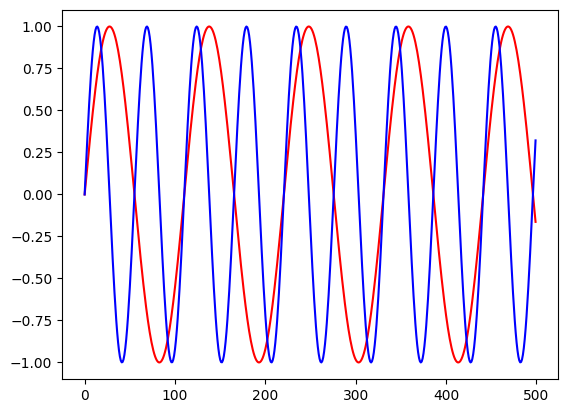 | 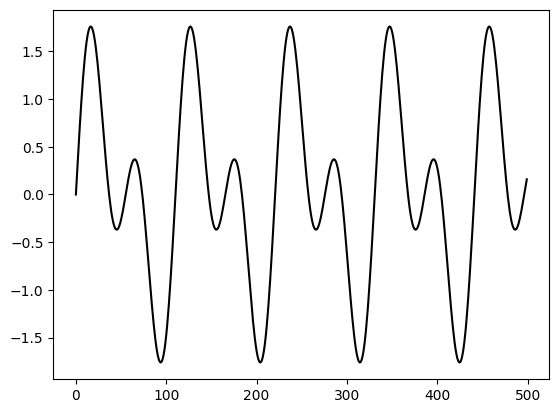 |

O c√≥digo utiliza a FFT para detectar os picos de frequ√™ncia presentes no sinal composto. Esses picos ‚Äî vis√≠veis no gr√°fico espectral gerado pela FFT (Figura 3) ‚Äî correspondem exatamente √†s componentes originais da modula√ß√£o, permitindo que cada segmento de √°udio seja interpretado como `'0'` ou `'1'` com base em qual frequ√™ncia est√° presente.

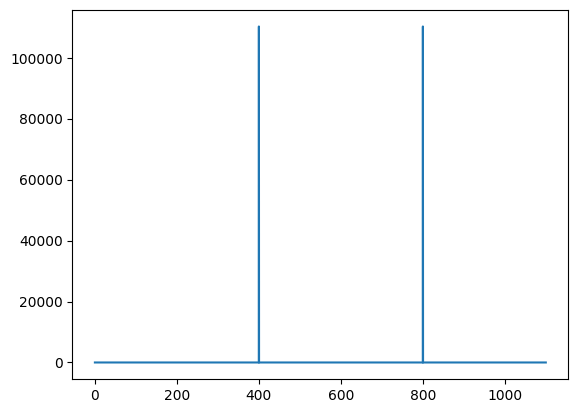

Assim como vimos em sala de aula, essa abordagem ilustra o processo de demodula√ß√£o por frequ√™ncia, fundamental no modelo de transmiss√£o FDM (Frequency Division Multiplexing).

J√° a fun√ß√£o `frequency_to_bit` interpreta a frequ√™ncia detectada como um bit bin√°rio, comparando-a com um limiar: se for superior ao valor definido, retorna `'1'`; caso contr√°rio, `'0'`. Esse processo simula uma decodifica√ß√£o simples de sinais FDM com base na presen√ßa de faixas de frequ√™ncia distintas.


üîß **Observa√ß√£o**: valores como `SAMPLE_RATE` e o `threshold` devem estar de acordo com as frequ√™ncias utilizadas (ja configurados no inicio do notebook) durante a modula√ß√£o para garantir a correta detec√ß√£o dos dados transmitidos.

In [17]:
def detect_frequency(audio_segment, sample_rate=SAMPLE_RATE):
    """
    Detecta a frequ√™ncia dominante em um segmento de √°udio
    
    Args:
        audio_segment: Segmento de √°udio
        sample_rate: Taxa de amostragem
    
    Returns:
        float: Frequ√™ncia detectada
    """
    # FFT para an√°lise espectral
    fft = np.fft.fft(audio_segment)
    freqs = np.fft.fftfreq(len(fft), 1/sample_rate)
    
    # Considera apenas frequ√™ncias positivas
    magnitude = np.abs(fft[:len(fft)//2])
    freqs_positive = freqs[:len(freqs)//2]
    
    # Encontra o pico de frequ√™ncia
    peak_idx = np.argmax(magnitude)
    detected_freq = abs(freqs_positive[peak_idx])
    
    return detected_freq

def frequency_to_bit(frequency, threshold=660):
    """
    Converte frequ√™ncia detectada em bit
    
    Args:
        frequency: Frequ√™ncia detectada
        threshold: Limiar para decis√£o (m√©dia entre FREQ_LOW e FREQ_HIGH)
    
    Returns:
        str: '0' ou '1'
    """
    return '1' if frequency > threshold else '0'

#### Decoders

In [18]:
def decode_nrz(audio_signal, num_bits, sample_rate=SAMPLE_RATE,debug=False):
    """
    Decodifica sinal NRZ
    
    Args:
        audio_signal: Sinal de √°udio
        num_bits: N√∫mero esperado de bits
        sample_rate: Taxa de amostragem
    
    Returns:
        str: Bits decodificados
    """
    samples_per_bit = int(sample_rate * BIT_DURATION)
    decoded_bits = ""
    
    show("Decodificando NRZ:",debug)
    
    for i in range(num_bits):
        start_idx = i * samples_per_bit
        end_idx = start_idx + samples_per_bit
        
        if end_idx > len(audio_signal):
            show(f"Aviso: √Åudio muito curto para {num_bits} bits",debug)
            break
        
        # Analisa o meio do bit para evitar transi√ß√µes
        mid_start = start_idx + samples_per_bit // 4
        mid_end = end_idx - samples_per_bit // 4
        segment = audio_signal[mid_start:mid_end]
        
        freq = detect_frequency(segment, sample_rate)
        bit = frequency_to_bit(freq)
        decoded_bits += bit
        
        show(f"Bit {i}: freq={freq:.1f}Hz -> '{bit}'",debug)
    
    return decoded_bits

In [19]:
def decode_nrzi(audio_signal, num_bits, sample_rate=SAMPLE_RATE,debug=False):
    """
    Decodifica sinal NRZI
    """

    pass
    
    return '0'

In [20]:
def decode_manchester(audio_signal, num_bits, sample_rate=SAMPLE_RATE,debug=False):
    """
    Decodifica sinal Manchester
    """
    samples_per_bit = int(sample_rate * BIT_DURATION)
    decoded_bits = ""
    
    show("Decodificando Manchester:",debug)
    
    for i in range(num_bits):
        start_idx = i * samples_per_bit
        end_idx = start_idx + samples_per_bit
        
        if end_idx > len(audio_signal):
            break
        
        # Analisa primeira e segunda metade do bit
        mid_point = start_idx + samples_per_bit // 2
        
        # Primeira metade
        first_half = audio_signal[start_idx + samples_per_bit//8 : mid_point - samples_per_bit//8]
        freq1 = detect_frequency(first_half, sample_rate)
        state1 = frequency_to_bit(freq1)
        
        # Segunda metade
        second_half = audio_signal[mid_point + samples_per_bit//8 : end_idx - samples_per_bit//8]
        freq2 = detect_frequency(second_half, sample_rate)
        state2 = frequency_to_bit(freq2)
        
        # Determina o bit baseado na transi√ß√£o
        if state1 == '1' and state2 == '0': # Alto -> Baixo
            bit = '1'  
            show(f"Bit {i}: {freq1:.1f}Hz -> {freq2:.1f}Hz = alto->baixo = '1'",debug)
        elif state1 == '0' and state2 == '1': # Baixo -> Alto
            bit = '0'  
            show(f"Bit {i}: {freq1:.1f}Hz -> {freq2:.1f}Hz = baixo->alto = '0'",debug)
        else: # Erro de decodifica√ß√£o
            bit = '?'  
            show(f"Bit {i}: {freq1:.1f}Hz -> {freq2:.1f}Hz = ERRO na transi√ß√£o",debug)
        
        decoded_bits += bit
    
    return decoded_bits

## O Laborat√≥rio

In [21]:
##
## configuracoes do audio (detalhes na sec√ß√£o de setup)
##
# output_device = 10
# input_device = 7
output_device = 10
input_device = 10
sd.default.device = (input_device, output_device)

##
## Configura√ß√µes globais do exercio
##
SAMPLE_RATE = 44100  # Taxa de amostragem do audio
BIT_DURATION = 1.0   # 1 segundo por bit
FREQ_LOW = 440       # bit '0' (L√°)
FREQ_HIGH = 880      # bit '1' (L√° oitava)

### Etapa 1: Compreendendo com a Codifica√ß√£o/Modula√ß√£o de dados

Nessa se√ß√£o voc√™ deve se familiariazar com algumas das funa√ß√µes de codifica√ß√£o (modula√ß√£o) vista em sala de aula

In [22]:
test_bits = "11001"
print(f"Dados originais: {test_bits}\n")

Dados originais: 11001



In [23]:
# Testa cada modula√ß√£o
print("1. NRZ:")
nrz_signal = encode_nrz(test_bits,debug=True)

print("\n3. Manchester:")
manchester_signal = encode_manchester(test_bits,debug=True)

1. NRZ:
Codificando NRZ: 11001
Bit 0: '1' -> 880 Hz
Bit 1: '1' -> 880 Hz
Bit 2: '0' -> 440 Hz
Bit 3: '0' -> 440 Hz
Bit 4: '1' -> 880 Hz

3. Manchester:
Codificando Manchester: 11001
Bit 0: '1' -> 880Hz -> 440Hz
Bit 1: '1' -> 880Hz -> 440Hz
Bit 2: '0' -> 440Hz -> 880Hz
Bit 3: '0' -> 440Hz -> 880Hz
Bit 4: '1' -> 880Hz -> 440Hz


**Escutando os dados** como a nossa proposta √© utilizar notas m√∫sicais (som) para representar `0` e `1`. Vamos escutalos.

In [24]:
sd.play(manchester_signal, SAMPLE_RATE)
sd.wait()

In [25]:
sd.play(nrz_signal, SAMPLE_RATE)
sd.wait()

Voc√™ pode visualizar a modula√ß√£o utilizando plots, com abaixo

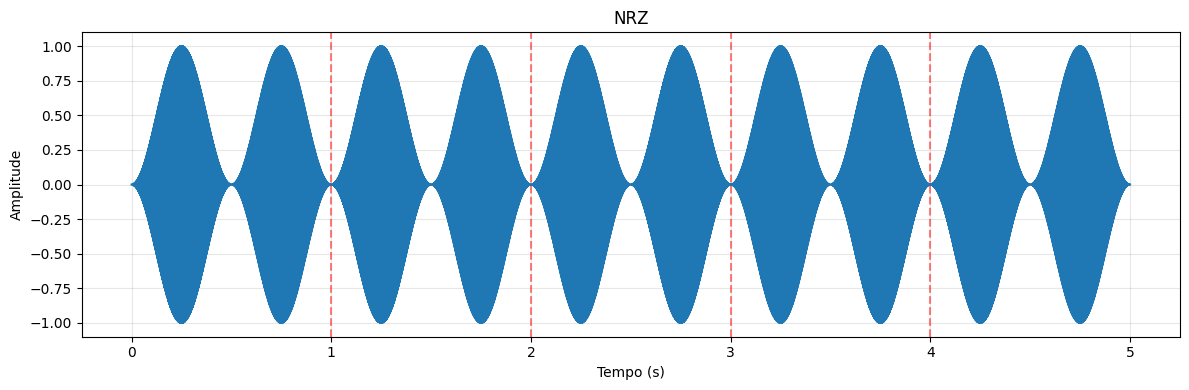

In [26]:
plot_signal(manchester_signal,'NRZ',len(test_bits))

##### Esse modula√ß√£o foi utilizada nos prim√≥rdios da internet (internet discada)

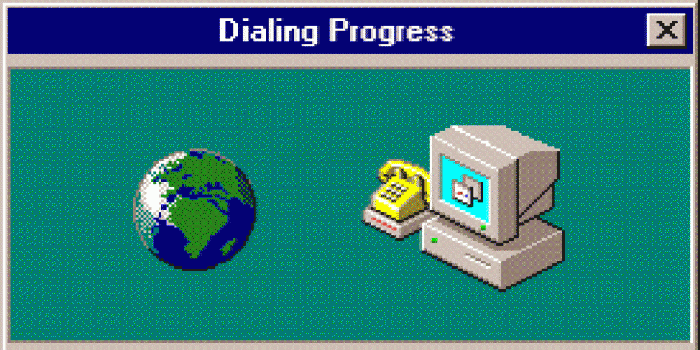

A internet discada utilizava modula√ß√£o anal√≥gica para transportar dados digitais pela linha telef√¥nica. Nos primeiros modems ‚Äî como os que seguiram o padr√£o Bell 103 ‚Äî a t√©cnica predominante foi a Frequency Shift Keying (FSK), onde duas frequ√™ncias distintas (uma para o bit 0 e outra para o bit 1) eram usadas para representar os dados.

Para quem n√£o teve a oportunidade de utilizar a internet discada o video abaixo ilustra bem o processo de modula√ß√£o utilizada

<iframe width="560" height="315" src="https://www.youtube.com/embed/ofVEEWObx_I?si=VzAD8hgPPeyXFSRn" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Etapa 2: Decodifica√ß√£o

Nesta etapa voc√™s ir√£o  recuperar os dados originais a partir do sinal de √°udio recebido. Este √© o papel do receptor em um sistema de comunica√ß√£o.

O primeiro passo para a decodifica√ß√£o (demodula√ß√£o) em um mundo ideal √© salvar o resultado da modula√ß√£o em um arquivo de audio (.wav)

In [27]:
# Dados de teste
test_data = "1010100000001111110000010101010111000"

print(f"Criando arquivos de teste para: {test_data}")

# NRZ
nrz_signal = encode_nrz(test_data)
sf.write('teste_nrz.wav', nrz_signal, SAMPLE_RATE)
print("\t ‚úì Arquivo teste_nrz.wav criado")

# Manchester
manchester_signal = encode_manchester(test_data)
sf.write('teste_manchester.wav', manchester_signal, SAMPLE_RATE)
print("\t ‚úì Arquivo teste_manchester.wav criado")


Criando arquivos de teste para: 1010100000001111110000010101010111000
	 ‚úì Arquivo teste_nrz.wav criado
	 ‚úì Arquivo teste_manchester.wav criado


In [28]:
original_data = test_data

print(f"\nDados originais: {original_data}")
print(f"N√∫mero de bits: {len(original_data)}\n")


Dados originais: 1010100000001111110000010101010111000
N√∫mero de bits: 37



Para evitar efeitos de atenua√ß√£o e interferencias vamos realizar a decodifica√ß√£o diretamente do arquivo de audio.

In [29]:
# Testa decodifica√ß√£o NRZ
print("1. Decodificando NRZ:")
nrz_audio, _ = sf.read('teste_nrz.wav')
decoded_nrz = decode_nrz(nrz_audio, len(original_data))
print(f"Original: {original_data}")
print(f"Decodificado: {decoded_nrz}")
print(f"Correto: {original_data == decoded_nrz}\n")

1. Decodificando NRZ:
Original: 1010100000001111110000010101010111000
Decodificado: 1010100000001111110000010101010111000
Correto: True



In [30]:
# Testa decodifica√ß√£o Manchester
print("3. Decodificando Manchester:")
manchester_audio, _ = sf.read('teste_manchester.wav')
decoded_manchester = decode_manchester(manchester_audio, len(original_data))
print(f"Original: {original_data}")
print(f"Decodificado: {decoded_manchester}")
print(f"Correto: {original_data == decoded_manchester}")

3. Decodificando Manchester:
Original: 1010100000001111110000010101010111000
Decodificado: 1010100000001111110000010101010111000
Correto: True


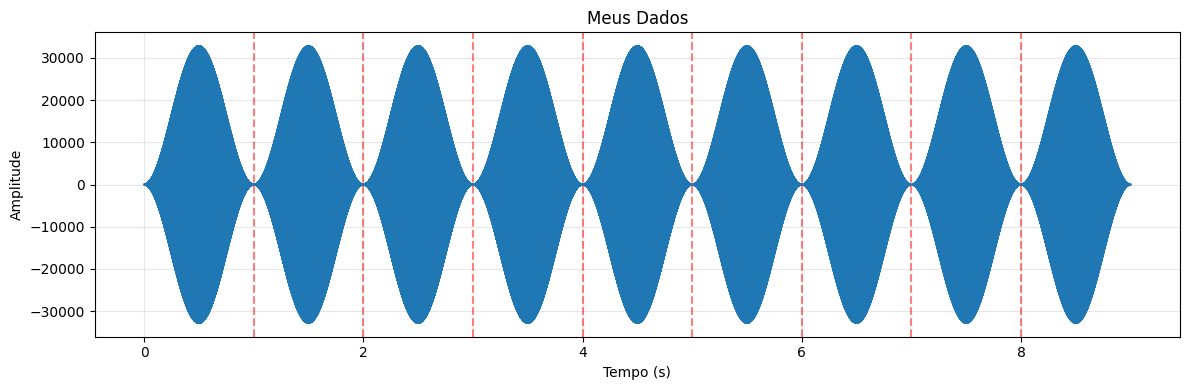

In [33]:
# Visualizando o comportamento do meu arquivo

my_fs, my_data = wavfile.read('dados_codificados/dados_49_44100hz.wav')
segundos = len(my_data) / my_fs
plot_signal(my_data, "Meus Dados", 9)

#### An√°lise do Resultado

O comportamento do plot anterior indica que a frequ√™ncia das ondas tem um comportamento de ondas NRZ, dessa maneira, irei decodificar utilizando essa estrat√©gia.

In [34]:
# Decodifica√ß√£o do meu arquivo - Wendell Tom√© Marinho Oliveira
print("Decodificando meu arquivo NRZ:")
my_audio_nrz, _ = sf.read('dados_codificados/dados_49_44100hz.wav')
decoded_my_nrz = decode_nrz(my_audio_nrz, len(my_data))
print(f"Decodificado: {decoded_my_nrz}")

Decodificando meu arquivo NRZ:
Decodificado: 101110000


### Etapa 3: Impacto do Ru√≠do na Comunica√ß√£o

Simula√ß√£o de decodifica√ß√£o em condi√ß√µes adversas, o metodo abaixo simula a adi√ß√£o de ru√≠do ao sinal.

In [36]:
def adicionar_ruido(audio_signal, snr_db=-12):
    """
    Adiciona ru√≠do gaussiano ao sinal
    
    Args:
        audio_signal: Sinal original
        snr_db: Rela√ß√£o sinal-ru√≠do em dB
    
    Returns:
        array: Sinal com ru√≠do
    """
    # Calcula pot√™ncia do sinal
    signal_power = np.mean(audio_signal ** 2)
    
    # Calcula pot√™ncia do ru√≠do baseada no SNR
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    
    # Gera ru√≠do gaussiano
    noise = np.random.normal(0, np.sqrt(noise_power), len(audio_signal))
    
    return audio_signal + noise

Para adicionar ruido utilize um valor **negativo** no `snr_db`. Por exemplo se voc√™ quiser um ruido de 3db utilize `snr_db=-3` no metodo.

A baixo veja a menssagem original

In [118]:
original_bits = "00111000"

In [119]:
snr=-3

clean_signal = encode_nrz(original_bits)

noisy_signal = adicionar_ruido(clean_signal, snr)
decoded = decode_nrz(noisy_signal, len(original_bits))
print(f"  Original: {original_bits}")
print(f"  Decodificado: {decoded}")
print(f"  Correto: {original_bits == decoded}\n")

  Original: 00111000
  Decodificado: 00111000
  Correto: True



#### An√°lise Cr√≠tica

Utilizarei o seguinte c√≥digo para analisar a partir de qual n√≠vel de ru√≠do o nosso decodificador ir√° come√ßar a falhar

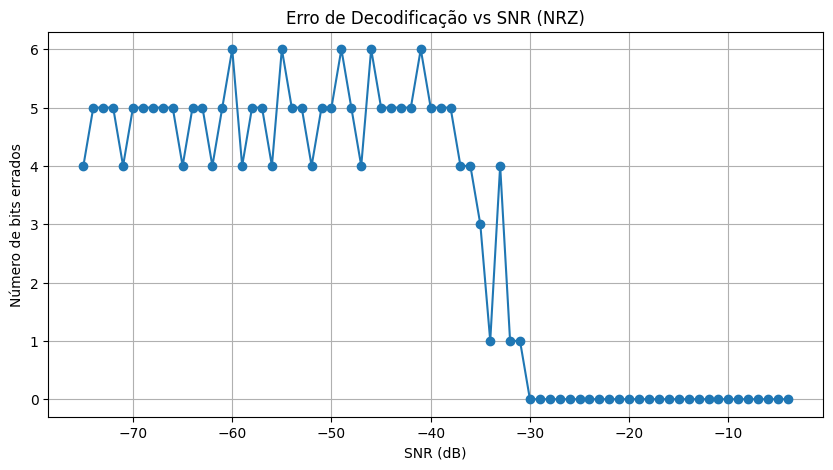

In [124]:
num_bits = len(original_bits)
BIT_DURATION = 1.0  
SNRs = np.arange(-75, -3, 1) 
errors = []

for snr in SNRs:
    clean_signal = encode_nrz(original_bits)
    noisy_signal = adicionar_ruido(clean_signal, snr)
    decoded = decode_nrz(noisy_signal, num_bits)
    
    # Conta n√∫mero de erros
    num_errors = sum([original_ != decoded_ for original_, decoded_ in zip(original_bits, decoded)])
    errors.append(num_errors)

# Plot do gr√°fico
plt.figure(figsize=(10, 5))
plt.plot(SNRs, errors, marker='o')
plt.title("Erro de Decodifica√ß√£o vs SNR (NRZ)")
plt.xlabel("SNR (dB)")
plt.ylabel("N√∫mero de bits errados")
plt.grid(True)
plt.show()


##### a) Identifique o valor de SNR onde os primeiros bits s√£o comprometidos.

Analisando o gr√°fico, observamos que os primeiros erros come√ßam a surgir em torno de SNR = -30dB. Acima desse valor, a decodifica√ß√£o foi perfeita.

#### b) Identifique o valor de SNR onde os todos os bits s√£o comprometidos

A partir de um SNR de aproximadamente -40 dB, observamos que o sistema atinge consistentemente uma taxa de erro elevada, chegando a 6 erros em 8 bits na mensagem original. 

Embora o ru√≠do tenha impacto direto na decodifica√ß√£o, tamb√©m √© importante considerar o fator **aleatoriedade** na gera√ß√£o do ru√≠do gaussiano, o que faz com que a ocorr√™ncia de todos os bits estarem errados (8/8) varie de execu√ß√£o para execu√ß√£o.

No entanto, o fato de estarmos nessa faixa de erro (6 ou mais erros) j√° indica que o n√≠vel de ru√≠do √© t√£o alto que o sinal original est√° quase completamente comprometido, e a decodifica√ß√£o correta se torna praticamente invi√°vel. Isso demonstra que, a partir desse ponto, o sistema perde a confiabilidade total e deixa de ser funcional.

### Etapa 4: Decodifica√ß√£o no mundo real

In [77]:
def capturar_do_microfone(duracao_segundos):
    """
    Captura √°udio do microfone
    
    Args:
        duracao_segundos: Dura√ß√£o da captura
    
    Returns:
        array: √Åudio capturado
    """
    print(f"Iniciando captura por {duracao_segundos} segundos...")
    print("Reproduza o √°udio no seu celular AGORA!")
    
    # Captura √°udio
    audio_capturado = sd.rec(
        int(duracao_segundos * SAMPLE_RATE), 
        samplerate=SAMPLE_RATE, 
        channels=1
    )
    sd.wait()  # Aguarda terminar a captura
    
    print("Captura conclu√≠da!")
    return audio_capturado.flatten()

In [ ]:
import random
import csv


def gerar_string_binaria(n):
    return ''.join(random.choice('01') for _ in range(n))


def gerar_questao(n,start=8,stop=16):
    dados = []
    for i in range(n):
        n_bits = random.randrange(start,stop)
        msg = gerar_string_binaria(n_bits)
        encoder = random.choice([encode_manchester, encode_nrz])
        modulacao = encoder.__name__
        nome = f"dados_{i}_{SAMPLE_RATE}hz.wav"
        sinal = encoder(msg)
        sf.write(nome, sinal, SAMPLE_RATE)
        
        linha = {
            'arquivo':nome,
            'msg': msg,
            'n_bits':n_bits,
            'modulacao':modulacao
        }
        dados.append(linha)
        # print(n_bits,msg,modulacao,nome,len(sinal))
    # print(dados):
    
    nome_arquivo = 'gabarito.csv'

    # Escrita no arquivo CSV
    with open(nome_arquivo, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=dados[0].keys())
        writer.writeheader()
        writer.writerows(dados)



gerar_questao(50)

Para este exerc√≠cio, voc√™ dever√° utilizar um **segundo dispositivo**, como por exemplo, seu **celular**.

1. Copie o arquivo de √°udio [dados_ar.wav](./dados_ar.wav) para o segundo dispositivo.
2. Este √°udio cont√©m uma **mensagem de 5 bits**, codificada utilizando o esquema **Manchester**.
3. O desafio consiste em **decodificar essa mensagem utilizando apenas o microfone do seu computador**.  
   **N√£o abra o arquivo diretamente** no computador ‚Äî apenas reproduza o √°udio no segundo dispositivo.

> üß™ Certifique-se de que os [procedimentos de configura√ß√£o](#setup) foram seguidos corretamente e que o microfone do seu computador est√° funcionando adequadamente.

Por fim, **execute o c√≥digo abaixo** (referente √† etapa de escuta por microfone) e reproduza o √°udio no segundo dispositivo para tentar decodificar a mensagem.

In [ ]:
# test_data = "10110"
# Captura √°udio

duracao = 5 * BIT_DURATION + 1  # +1 segundo de margem
audio_capturado = capturar_do_microfone(duracao)

# Salva captura para an√°lise
sf.write('captura_microfone.wav', audio_capturado, SAMPLE_RATE)

# Tenta decodificar
print("\nTentando decodificar...")
decoded = decode_manchester(audio_capturado, 5)

print(f"Original: ?????")
print(f"Capturado: {decoded}")

Iniciando captura por 6.0 segundos...
Reproduza o √°udio no seu celular AGORA!
Captura conclu√≠da!

Tentando decodificar...
Original: ?????
Capturado: 10110
